In [27]:
import numpy as np  
import pandas as pd  
import os 
from sklearn.datasets import load_files

In [28]:
from sklearn.datasets import load_files
data_dir = r'C:\Users\Ikjot singh\Coding\finalPlantfiy\data\flowers'
data = load_files(data_dir)


In [29]:
folders=os.listdir(data_dir)
print(folders)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


#### We have one folder for each flower classe or type. We are going to load it into two numpy arrays as follows :    

- X - filenames (Training data)
- y - flower names(Target labels)

In [30]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\sunflower\\7176729016_d73ff2211e.jpg'
 'C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\dandelion\\18385846351_3a2bf60427_n.jpg'
 'C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\dandelion\\98992760_53ed1d26a9.jpg'
 ...
 'C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\dandelion\\7184780734_3baab127c2_m.jpg'
 'C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\sunflower\\10386540106_1431e73086_m.jpg'
 'C:\\Users\\Ikjot singh\\Coding\\finalPlantfiy\\data\\flowers\\sunflower\\164670176_9f5b9c7965.jpg']
Target labels -  [3 1 1 ... 1 3 3]


In [31]:
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)
    
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  4317
Number of training targets :  4317


### Load the images


In [32]:

from tensorflow.keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(4317, 150, 150, 3)
First training item :  [[[101. 114.   8.]
  [ 33.  38.  18.]
  [ 23.  29.  15.]
  ...
  [  1. 102. 190.]
  [  4. 103. 188.]
  [ 13.  74. 128.]]

 [[ 31.  39.  15.]
  [ 23.  32.  15.]
  [ 23.  27.  12.]
  ...
  [  0.  47. 106.]
  [  8.  72. 116.]
  [ 24.  77. 121.]]

 [[ 54.  62.  15.]
  [ 28.  32.  17.]
  [ 29.  32.  21.]
  ...
  [  0.  55. 103.]
  [  5.  34.  66.]
  [  5.  31.  64.]]

 ...

 [[ 99.  96.  27.]
  [ 82.  84.  21.]
  [ 72.  68.  33.]
  ...
  [ 94. 112. 134.]
  [ 88. 101. 118.]
  [ 78.  89. 107.]]

 [[114. 107.  17.]
  [109.  99.  40.]
  [108.  84.  60.]
  ...
  [ 87. 105. 129.]
  [ 83. 103. 130.]
  [ 86.  97. 115.]]

 [[166. 157.  56.]
  [130. 112.  36.]
  [184. 178.  28.]
  ...
  [ 32.  32.  30.]
  [ 64.  75.  81.]
  [ 83.  95. 117.]]]


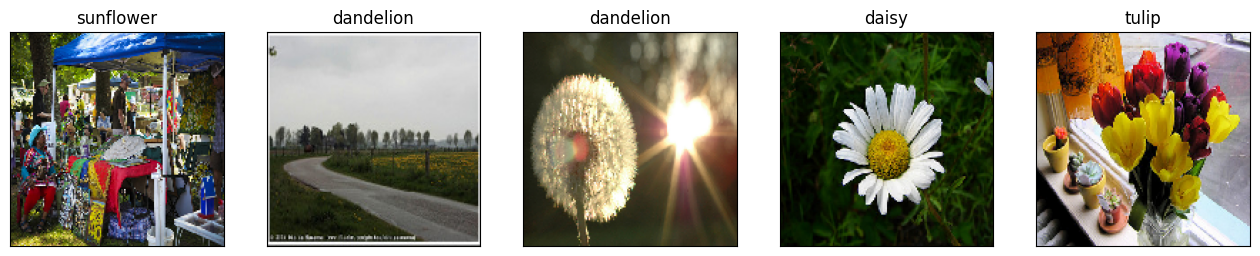

In [33]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [34]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

5

In [35]:
y

array([3, 1, 1, ..., 1, 3, 3])

In [36]:
from keras.utils import np_utils
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  864
The training Data Shape  432


In [38]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


### **CNN Implementation**


In [39]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### CNN Architecture

In [40]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

### Model Summary

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 Maxpool_1 (MaxPooling2D)    (None, 74, 74, 32)        0         
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 36, 36, 64)       

In [42]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 75
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = "Final_Plantify.h5", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
history=model.fit_generator(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/75


C:\Users\Ikjot singh\AppData\Local\Temp\ipykernel_14304\3825203946.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


107/107 [==============================] - ETA: 0s - loss: 1.9687 - accuracy: 0.3061
Epoch 1: val_loss improved from inf to 1.28227, saving model to Final_Plantify.h5
107/107 [==============================] - 176s 2s/step - loss: 1.9687 - accuracy: 0.3061 - val_loss: 1.2823 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 2/75
107/107 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.4589
Epoch 2: val_loss improved from 1.28227 to 1.05607, saving model to Final_Plantify.h5
107/107 [==============================] - 177s 2s/step - loss: 1.2690 - accuracy: 0.4589 - val_loss: 1.0561 - val_accuracy: 0.5903 - lr: 0.0010
Epoch 3/75
107/107 [==============================] - ETA: 0s - loss: 1.1530 - accuracy: 0.5490
Epoch 3: val_loss improved from 1.05607 to 0.91461, saving model to Final_Plantify.h5
107/107 [==============================] - 178s 2s/step - loss: 1.1530 - accuracy: 0.5490 - val_loss: 0.9146 - val_accuracy: 0.6412 - lr: 0.0010
Epoch 4/75
107/107 [==============

### Model Evaluation

In [44]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
model.save("classifier.h5")
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

14/14 - 4s - loss: 0.6608 - accuracy: 0.8426 - 4s/epoch - 283ms/step
Accuracy: 84.26%
Loss: 0.6608031988143921


### Loading the model


In [46]:
my_model=keras.models.load_model('Final_Plantify.h5')

14/14 [==============================] - 4s 274ms/step


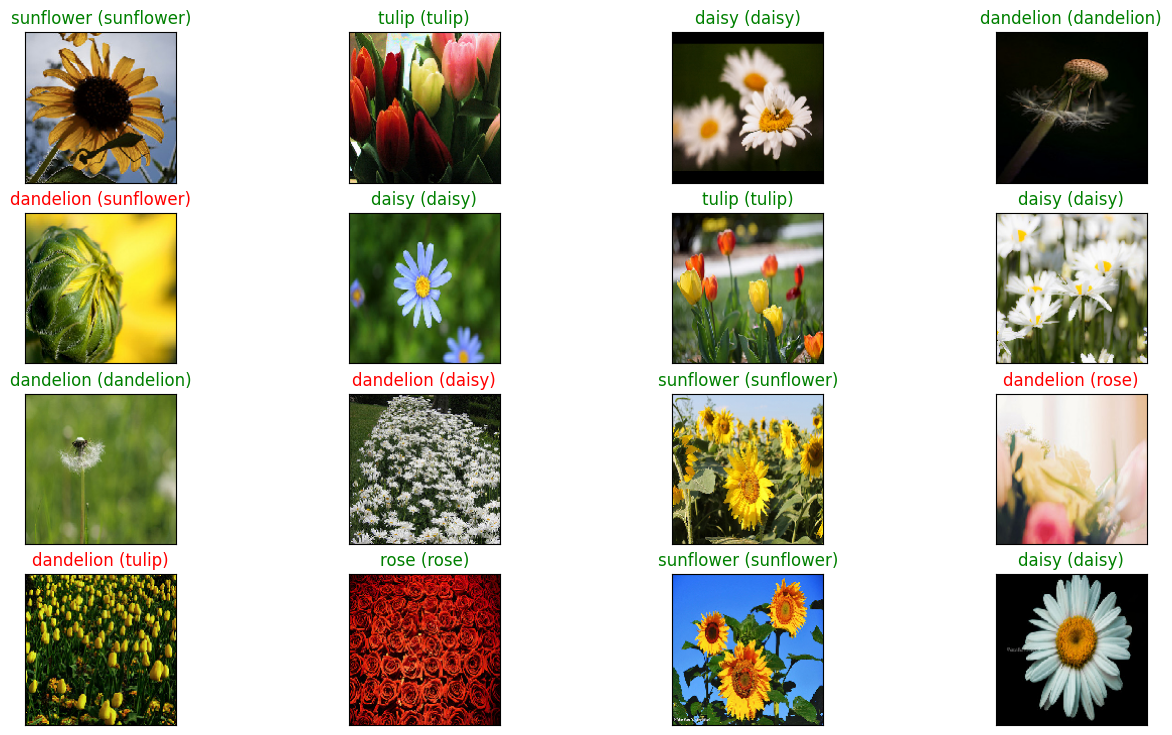

In [47]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))
my_model.predict(X_test)

visualize_pred(my_model.predict(X_test))